In [1]:
from tvb.datatypes import surfaces
from brainvistools.surf import mesh, template
from brainvistools import surf
from templateflow.api import get
import nibabel as nib
import numpy as np

from neuromaps import transforms, datasets, nulls

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
rh, lh = transforms.fslr_to_fslr(
    datasets.fetch_annotation(source="hcps1200", desc="megdelta"), target_density="32k"
)


In [3]:
gii_img = nib.load(get('fsLR', density='32k', hemi='L', suffix='inflated', desc=None))

In [5]:
def timeseries(data, template='fsLR', surface='inflated', hemi='L'):
    gii_img = nib.load(get(template, density='32k', hemi=hemi, suffix=surface, desc=None))



    vertices, triangles = gii_img.darrays[0].data, gii_img.darrays[1].data

    arr = surf.plot.surf_vtk2mpl(
        vertices=vertices, triangles=triangles, values=data[0], window_size_factor=12, view='lateral', hemi='left', return_array=True
    )

    fig, ax = plt.subplots()
    im = ax.imshow(arr)
    ylim = ax.get_ylim()
    ax.set_ylim((2000, 10000))
    ax.set_xlim((1500, 11000))


    # Update function for animation
    def update(frame):
        # Generate new data for each frame (replace with your own data updating logic)
        data=data[frame]

        arr = surf.plot.surf_vtk2mpl(
            vertices=vertices, triangles=triangles, values=data,
            window_size_factor=12, view='lateral', hemi='left', return_array=True)
        im.set_array(arr)
        return [im]

    # Create animation
    ani = FuncAnimation(fig, update, frames=10, interval=10, blit=True)

    return ani

In [7]:
import matplotlib
from matplotlib.animation import FuncAnimation, FFMpegWriter

matplotlib.use('Agg')
from IPython.display import HTML
ani.save('animation.mov', writer=FFMpegWriter(fps=20))


Context leak detected, msgtracer returned -1


In [ ]:
filepath = get("onavg", hemi='L', suffix="sphere", extension="surf")
# nib.load(filepath)

In [ ]:
import numpy as np


def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in 3D space.

    Parameters
    ----------
    point1 : array_like
        The coordinates of the first point as an array or list of three values: [x1, y1, z1].
    point2 : array_like
        The coordinates of the second point as an array or list of three values: [x2, y2, z2].

    Returns
    -------
    float
        The Euclidean distance between the two points.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.linalg.norm(point1 - point2)


def gaussian_decay(vertices, vertex_index, sigma):
    """
    Calculate a Gaussian decay around a specific vertex.

    Parameters
    ----------
    vertices : numpy.ndarray
        Array of vertices with shape (n, 3), where n is the number of vertices.
    vertex_index : int
        The index of the vertex around which to calculate the Gaussian decay.
    sigma : float
        The standard deviation of the Gaussian kernel.

    Returns
    -------
    numpy.ndarray
        The array of weighted values based on the Gaussian decay, with one value per vertex.

    """
    # Step 2: Calculate distances
    distances = np.array(
        [euclidean_distance(v, vertices[vertex_index]) for v in vertices]
    )

    # Step 3: Apply Gaussian kernel to model the decay
    decay_values = np.exp(-(distances**2) / (2 * sigma**2))

    return decay_values


# Usage example:
# vertices = ... (your array of vertices)

# values = ... (the array of values at the vertices, optional)
# result

In [ ]:
vertices, triangles = template.get_surface_data(
    template="fsLR", surface="sphere", hemi="rh"
)


decay = gaussian_decay(vertices, 5, 10)

vertices, triangles = template.get_surface_data(
    template="fsLR", surface="inflated", hemi="rh"
)
fig = surf.plot.surf_vtk2mpl(
    vertices=vertices, triangles=triangles, values=decay, window_size_factor=10
)
# fig.set_dpi(1000)
fig

UnboundLocalError: local variable 'azimuth' referenced before assignment

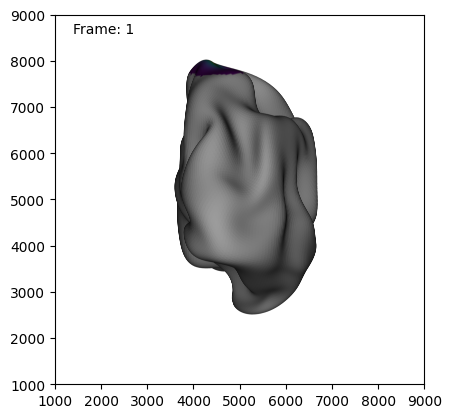

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

sigma = 10
vertices, triangles = template.get_surface_data(
    template="fsLR", surface="inflated", hemi="rh"
)
sphere_vertices, sphere_triangles = template.get_surface_data(
    template="fsLR", surface="sphere", hemi="rh"
)
decay = gaussian_decay(sphere_vertices, 0, sigma)
arr = surf.plot.surf_vtk2mpl(
    vertices=vertices, triangles=triangles, values=decay, return_array=True
)

fig, ax = plt.subplots()
ax.set_xlim([1000, 9000])  # these values are just for demonstration
ax.set_ylim([1000, 9000])

im = ax.imshow(arr)
# Text to display the frame number
frame_text = ax.text(0.05, 0.95, "0", transform=ax.transAxes, color="black")


# Animation function
def update(frame):
    decay = gaussian_decay(sphere_vertices, frame, sigma)
    arr = surf.plot.surf_vtk2mpl(
        vertices=vertices, triangles=triangles, values=decay, return_array=True
    )
    im.set_array(arr)
    frame_text.set_text(f"Frame: {frame}")
    return [im]


# Create an animation
ani = FuncAnimation(fig, update, frames=np.arange(1, len(vertices), 1)[:30], blit=True)

In [ ]:
# Save the animation
# ani.save("gaussian_decay_animation_with_frame_num.gif", writer="imagemagick")